# LAB02 Assigment Template




### Exercise 0  Importing the census 

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

# Import supplementary visualization code visuals.py
import Lab02_Visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv('census.csv')

### Exercise 1  Exploration 

In [3]:
# The total number of records
n_records = len(data)
print('n_records:',n_records)

n_records: 45222


In [3]:
# The number of individuals making more than $50000 annually
print(data[data['income']!='<=50K'].shape[0])

11208


In [4]:
# The number of individuals making at most $50000 annually
print(data[data['income']=='<=50K'].shape[0])

34014


In [5]:
# The percentage of individuals making more than $50000 annually
print(data[data['income']!='<=50K'].shape[0]/data.shape[0])

0.2478439697492371


### Exercise 2 Preprocessing 

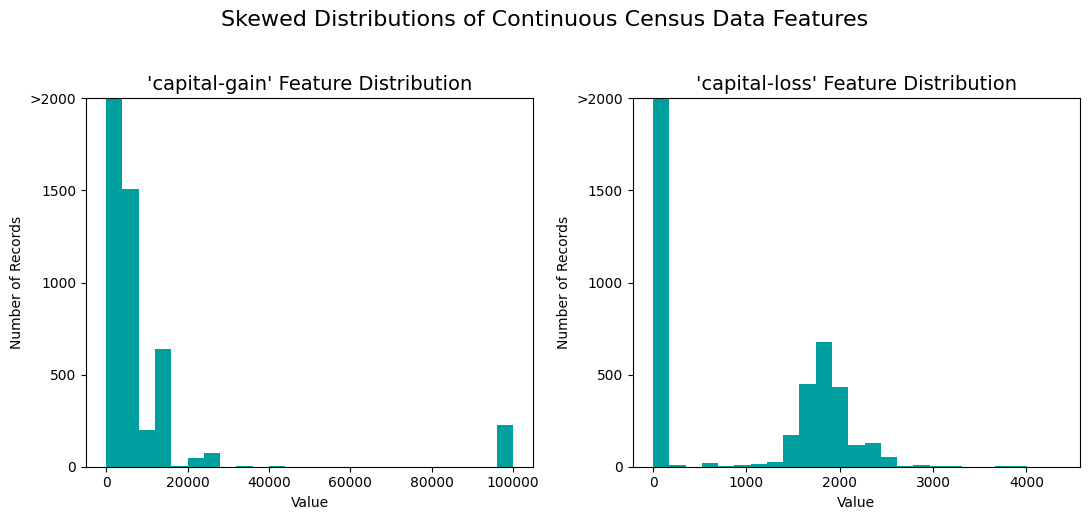

In [8]:
# Visualize skewed continuous features of original data
income_raw = data['income']
data = data.drop('income', axis=1)
vs.distribution(data)

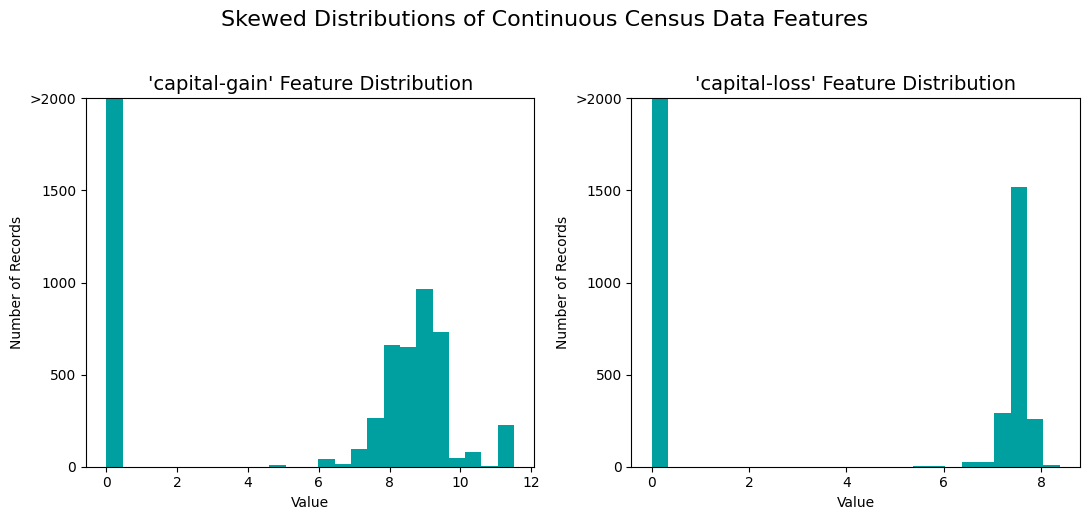

In [9]:
# Outliers Treatment

data['capital-gain']=np.log(data['capital-gain']+1)
data['capital-loss']=np.log(data['capital-loss']+1)
vs.distribution(data)

In [11]:
# Data Transformation
from sklearn.preprocessing import MinMaxScaler

income = income_raw.replace([">50K"], 1).replace(["<=50K"], 0)
features_final = pd.get_dummies(
    data,
    prefix=None,
    prefix_sep="_",
    dummy_na=False,
    columns=None,
    sparse=False,
    drop_first=False,
)

scaler = MinMaxScaler()
numerical = ["age", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
features_final[numerical] = scaler.fit_transform(features_final[numerical])

### Exercise 3 Shuffle and Split Data

In [28]:
# Split the 'feature' and 'income' data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_final, income, test_size = 0.2, random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


### Exercise 4 Evaluating Model
The following are some of the supervised learning models that are currently available in `scikit-learn`:
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, RandomForest)
- K-Nearest Neighbors
- Support Vector Machines (SVM)
- Logistic Regression
You need choose three of them, draw three ROC curves on the census data, and analyze and compare the them.

In [21]:
# Evaluating Model
from sklearn.metrics import roc_curve, accuracy_score, f1_score

def plot_roc(test, pred, model):
    fpr, tpr, thersholds = roc_curve(test, pred)
    plt.plot(fpr, tpr, color="red", label="ROC")
    plt.plot([0, 1], [0, 1], color="blue", linestyle="--", label="random")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve of {} Model".format(model))
    plt.legend()
    plt.show()

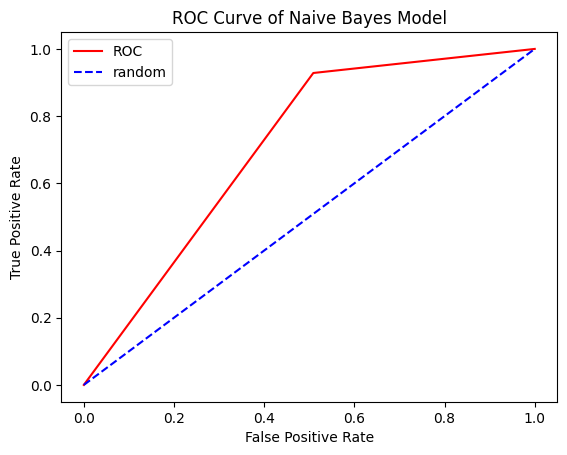

accuracy score:  0.5976782752902156
f1 score:  0.5294193715246347


In [29]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
plot_roc(y_test,y_pred,'Naive Bayes')
print('accuracy score: ',accuracy_score(y_test,y_pred))
print('f1 score: ',f1_score(y_test,y_pred))

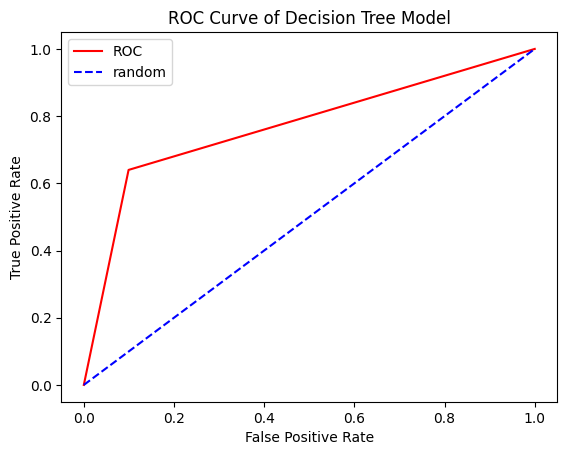

accuracy score:  0.8371475953565506
f1 score:  0.6570430733410944


In [30]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=20)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
plot_roc(y_test,y_pred,'Decision Tree')
print('accuracy score: ',accuracy_score(y_test,y_pred))
print('f1 score: ',f1_score(y_test,y_pred))

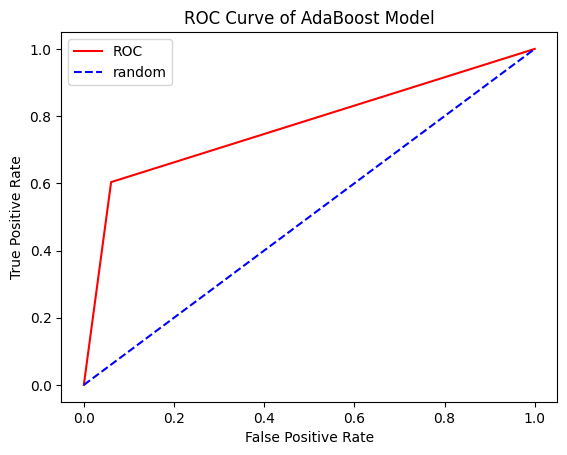

accuracy score:  0.8576008844665561
f1 score:  0.6739240506329114


In [31]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
plot_roc(y_test,y_pred,'AdaBoost')
print('accuracy score: ',accuracy_score(y_test,y_pred))
print('f1 score: ',f1_score(y_test,y_pred))

### Exercise 4 Questions
What would the accuracy and F-score be on this dataset if we chose a model that always predicted an individual made more than $50,000

In [33]:
# What would the accuracy and F-score be on this dataset if we chose a model that always predicted an individual made more than $50,000
y_pred.fill(1)
print('accuracy score: ',accuracy_score(y_test,y_pred))
print('f1 score: ',f1_score(y_test,y_pred))

accuracy score:  0.24378109452736318
f1 score:  0.392


### Exercise 5 Evaluating Model 

1. An important task when performing supervised learning on a dataset like the census data we study here is determining which features provides the most predictive power. Choose a scikit-learn classifier (e.g adaboost, random forests) that has a feature_importance_ attribute, which is a function that ranks the importance of features according to the chosen classifier. List three of the supervised learning models above that are appropriate for this problem that you will test on the census 
2. Describe one real-world application in industry where a model can be applied
3. What are the strengths of the model; when does it perform well?
4. What are the weaknesses of the model; when does it perform poorly?
5. What makes this model a good candidate for the problem, given what you know about the data?

1. Random Forest Classifier, AdaBoost Classifier, Extra Trees Classifier

2. Cancer detection by medical images classification

3. Strengths of the Model:
    - High predictive accuracy: Supervised learning models can achieve high accuracy when trained on large and well-labeled datasets.
    - Generalization: They can generalize patterns and make predictions on unseen data.
    - Versatility: Various algorithms can be tailored to different types of problems, such as classification, regression, or clustering.
    
    When Does it Perform Well:
    - When there is a substantial amount of labeled training data.
    - When the relationship between input features and the target variable is well-defined and can be learned from the data.


4. Weaknesses of the Model:
    - Requires labeled data: Supervised learning models require a substantial amount of labeled data for training.
    - Overfitting: They can overfit the training data if not properly regularized.
    - Limited to known patterns: They may not perform well when faced with novel or rare patterns that were not present in the training data.
    
    When Does it Perform Poorly:
    - When there is limited labeled data available.
    - When the data is noisy or contains errors.
    - When the model assumptions do not hold for the problem at hand.


5. Why These Models are Good Candidates for the Problem:
    - They can handle both binary classification tasks (e.g., predicting income levels) effectively.
    - They can automatically rank the importance of features, which is crucial for understanding which attributes are most influential in predicting income levels.
    - They are robust to outliers and can handle a mix of categorical and numerical features, which are common in census data.
    - They can capture complex relationships between features and the target variable, which may exist in the data.